## Setup a mario environment

In [ ]:
 # !pip install gym_super_mario_bros nes_py

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
#SETTUP GAME
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(500): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

In [ ]:
env.close()

## Preprocess the game for applied AI

In [ ]:
# Install pytorch
!pip3 install torch torchvision torchaudio

In [ ]:
# Install stable baselines for RL stuff
%pip install stable-baselines3[extra]

In [3]:
# Import GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Frame Stacker Wrapper Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [4]:
# Wrapping the environment

# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Greyscale the environment
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Create the stacked frames
env = VecFrameStack(env, 4,channels_order='last')

In [13]:
state = env.reset()

In [21]:
state.shape

(240, 256, 3)

In [30]:
state, reward, done, info = env.step([5])

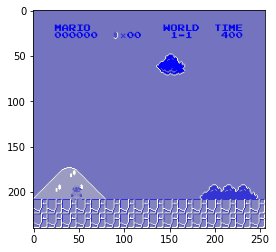

In [7]:
plt.imshow(state[0])

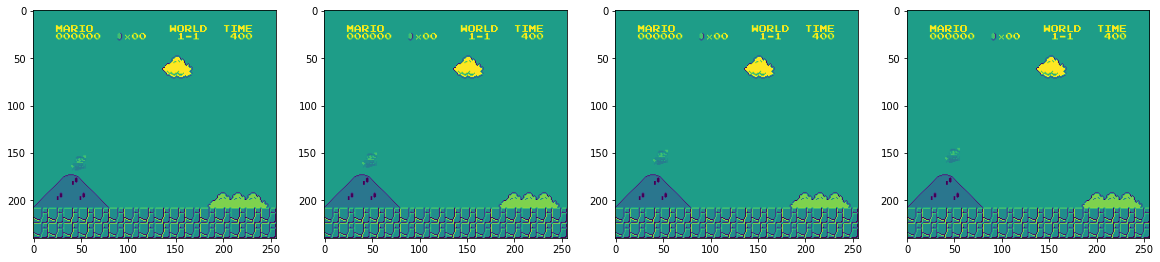

In [31]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## Train the model to play

## Finally